# Language Model based on WikiCorpus

### 由于硬件原因，使用了zhwiki-20190401-pages-articles-multistream.xml.bz2中5%的语料库

In [1]:
import jieba 
import re
import os
from functools import reduce
from collections import Counter

In [2]:
TEXT_PATH = 'D:\Project\Study_course\lesson_02/twentyth_text'
#所有文档已处理成一个超长的字符串。详见作业process.py

In [3]:
with open(TEXT_PATH,'r',encoding='utf-8') as f:
    texts = f.read()

In [4]:
len(texts) 

74102021

In [5]:
texts[:10]

'数学 数学是利用符号'

In [6]:
def cut(string):
    return qukong(list(jieba.cut(string)))
def qukong(L):
    return [ele for ele in L if ele !=' ']


In [7]:
ALL_TOKENS = cut(texts)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hc\AppData\Local\Temp\jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built succesfully.


In [8]:
ALL_TOKENS

['数学',
 '数学',
 '是',
 '利用',
 '符号语言',
 '研究',
 '数量',
 '结构',
 '变化',
 '以及',
 '空间',
 '等',
 '概念',
 '的',
 '一门',
 '学科',
 '从',
 '某种',
 '角度看',
 '属于',
 '形式',
 '科学',
 '的',
 '一种',
 '数学',
 '透过',
 '抽象化',
 '和',
 '逻辑推理',
 '的',
 '使用',
 '由',
 '计数',
 '计算',
 '量度',
 '和',
 '对',
 '物体',
 '形状',
 '及',
 '运动',
 '的',
 '观察',
 '而',
 '产生',
 '数学家',
 '们',
 '拓展',
 '这些',
 '概念',
 '为了',
 '公式化',
 '新',
 '的',
 '猜想',
 '以及',
 '从',
 '选定',
 '的',
 '公理',
 '及',
 '定义',
 '中',
 '建立',
 '起',
 '严谨',
 '推导',
 '出',
 '的',
 '定理',
 '基础',
 '数学',
 '的',
 '知识',
 '与',
 '运用',
 '总是',
 '个人',
 '与',
 '团体',
 '生活',
 '中',
 '不可或缺',
 '的',
 '一环',
 '对',
 '数学',
 '基本概念',
 '的',
 '完善',
 '早',
 '在',
 '古埃及',
 '美索不达米亚',
 '及',
 '古印度',
 '内',
 '的',
 '古代',
 '数学',
 '文本',
 '便',
 '可观',
 '见',
 '而',
 '在',
 '古希腊',
 '那里',
 '有',
 '更为',
 '严谨',
 '的',
 '处理',
 '从',
 '那时',
 '开始',
 '数学',
 '的',
 '发展',
 '便',
 '持续',
 '不断',
 '地',
 '小幅',
 '进展',
 '至',
 '16',
 '世纪',
 '的',
 '文艺复兴',
 '时期',
 '因为',
 '新',
 '的',
 '科学',
 '发现',
 '和',
 '数学',
 '革新',
 '两者',
 '的',
 '交互',
 '致使',
 '数学',
 '的',
 '加速',
 '发展',
 '

In [9]:
words_count = Counter(ALL_TOKENS)

In [10]:
words_count.most_common(10)

[('的', 1980075),
 ('在', 529499),
 ('年', 448118),
 ('是', 371326),
 ('和', 304446),
 ('了', 258134),
 ('为', 236654),
 ('月', 188986),
 ('与', 186083),
 ('有', 173841)]

In [11]:
frequences = [f for w,f in words_count.most_common(100)]

In [12]:
x = [i for i in range(len(frequences[:100]))]

In [13]:
len(frequences)

100

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

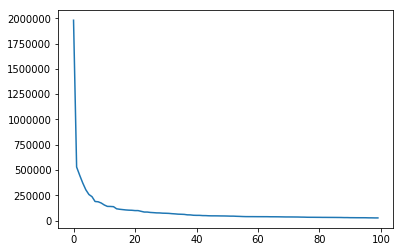

In [16]:
plt.plot(x,frequences)

In [17]:
import numpy as np

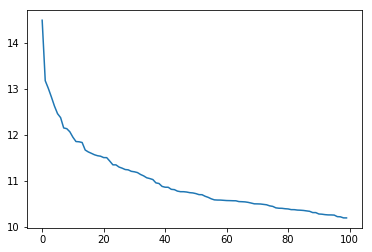

In [18]:
plt.plot(x,np.log(frequences))

In [19]:
frequences_all = [f for w,f in words_count.most_common()]

In [20]:
frequences_sum = sum(frequences_all)

In [21]:
frequences_sum

35076052

In [22]:
1 / frequences_sum

2.8509479915242457e-08

In [23]:
def get_prob(word):
    # if word in words_count return the prob of word in word_count
    # else return small value 
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return esp
def product(numbers):
    # 阶乘
    return reduce(lambda n1,n2:n1 * n2,numbers)
def language_model_one_gram(string):
    # 基于语料库，返回一句话可能出现的概率
    # 很明显，这是一个基于1-gram（ bi-gram）的语言模型，只跟前面一个词的概率相关
    words = cut(string)
    return product([get_prob(w) for w in words])
def language_model_of_2_gram(sentence):
    sentence_probaility = 1
    words = cut(sentence)
    for i ,word in enumerate(words):
        if i ==0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_combination_prob(previous,word)
        sentence_probaility *= prob
    return sentence_probaility

In [24]:
#example two
#语序、错别字、长短句
need_compared = ['今晚我们吃大餐 我们大餐吃今晚',
                '真事一只好看的小猫 真是一只好看的小猫',
                '我去吃火锅 今晚我去吃火锅']
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = language_model_one_gram(s1),language_model_one_gram(s2)
    better = s1 if p1>p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

我们大餐吃今晚 is more possible
---- 今晚我们吃大餐 with probility 1.0856991065414143e-20
---- 我们大餐吃今晚 with probility 1.0856991065414143e-20
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 5.714215841629453e-26
---- 真是一只好看的小猫 with probility 3.821808163610882e-23
我去吃火锅 is more possible
---- 我去吃火锅 with probility 8.404716514727997e-15
---- 今晚我去吃火锅 with probility 1.0063792060137667e-20


In [25]:
def language_model_of_2_gram(sentence):
    sentence_probaility = 1
    words = cut(sentence)
    for i ,word in enumerate(words):
        if i ==0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_combination_prob(previous,word)
        sentence_probaility *= prob
    return sentence_probaility
def get_combination_prob(w1,w2):
    if w1+w2 in _2_gram_counter:return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1/_2_gram_sum

In [26]:
all_2_grams_words = [''.join(ALL_TOKENS[i:i+2]) for i in range(len(ALL_TOKENS[:-2]))]
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

In [27]:
len(all_2_grams_words)

35076050

In [28]:
#example two
#语序、错别字、长短句
need_compared = ['今晚我们吃日料 我们今晚吃中餐',
                '真事一只好看的小猫 真是一只好看的小猫',
                '我去吃火锅 今晚我去吃火锅',
                '国内996 国外955']
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = language_model_of_2_gram(s1),language_model_of_2_gram(s2)
    better = s1 if p1>p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

我们今晚吃中餐 is more possible
---- 今晚我们吃日料 with probility 5.549278732615553e-29
---- 我们今晚吃中餐 with probility 6.915458306311858e-27
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.1029423633654555e-40
---- 真是一只好看的小猫 with probility 6.749791192466636e-34
我去吃火锅 is more possible
---- 我去吃火锅 with probility 1.7389580966704964e-17
---- 今晚我去吃火锅 with probility 2.6081610043293102e-27
国内996 is more possible
---- 国内996 with probility 4.781646460800785e-12
---- 国外955 with probility 9.550288273739457e-13


### If we need to solve following problems, how can language model help us?

Ans：语言模型可以判断一个句子是否合理，同理，在这些任务中，根据输入，结合语料库，会判断概率最大的句子是什么。比如，搜狗拼音输入，输入fugui，最可能的是富贵，而不是服贵。

### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods?

Ans: 基于概率的模型简单直观，对缺失的数据不敏感。而基于模式匹配的方法在逻辑复杂的任务中非常富复杂，不易实现。
对于基于概率的模型的缺点：实际应用中，通常采用事件独立的方法来进行概率计算，这忽视了事件之间的联系；若包含事件之间的联系，如2-gram，3-gram等，计算量会非常大。

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

Ans: 在语言模型任务中，由于语料库原因，某些低频次、生僻词可能不在语料库中，在我的模型我设置了一个极小的概率，也就是1/sum_of_words，其中sum_of_words是词库词数大小，表示它是一个低频次，从而避免概率为0的情况。

**Q2: Read about the 'Turing-Good Estimator', can explain the main points about this method, and may implement this method in your programming task**

Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37